<a href="https://colab.research.google.com/github/tailorfenil/MLColab/blob/YOLOv1/CV_2_P_3_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v1 architecture

### Introduction:
This code snippet demonstrates an implementation of YOLOv1 (You Only Look Once version 1), a pioneering object detection model.
YOLOv1 was designed for real-time object detection, and this implementation showcases its key components using PyTorch.

### Context:
In this code, we define the architecture for YOLOv1 including its feature extraction backbone, adaptive pooling layer, and fully connected layers for classification and bounding box prediction. YOLOv1 divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. This code sets up the neural network structure for YOLOv1, which can be further trained and fine-tuned for specific object detection tasks.


In [ ]:
import torch
import torch.nn as nn

class YOLOv1(nn.Module):
    """
    YOLOv1 (You Only Look Once version 1) implementation for object detection.

    Args:
        num_classes (int): Number of object classes to detect.
        num_boxes (int): Number of bounding boxes to predict per grid cell.

    Attributes:
        features (nn.Sequential): The feature extraction backbone consisting of convolutional layers.
        avgpool (nn.AdaptiveAvgPool2d): Adaptive average pooling layer to produce fixed-size feature maps.
        classifier (nn.Sequential): The fully connected layers for classification and bounding box prediction.

    Note:
        YOLOv1 is an early version of the YOLO object detection model. It consists of a series of convolutional layers
        for feature extraction followed by fully connected layers for classification and bounding box prediction.

    Reference:
        - Original YOLO paper: https://arxiv.org/abs/1506.02640
    """
    def __init__(self, num_classes=20, num_boxes=2):
        super(YOLOv1, self).__init__()
        self.features = nn.Sequential(
            # Convolutional layers
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(192, 128, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 256, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 256, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 256, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(1024, 512, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 512, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(1024 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes + num_boxes * 5),  # Adjust output size for classes and bounding boxes
        )

    def forward(self, x):
        layer_outputs = []
        for layer in self.features:
            x = layer(x)
            layer_outputs.append(x.size())
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x, layer_outputs



In [ ]:
# Instantiate the model
model = YOLOv1()

# Display the model architecture
print(model)

# Input image dimensions
input_image = torch.randn(1, 3, 448, 448)  # Batch size of 1, 3 channels, 448x448 image
output, layer_sizes = model(input_image)

# Print dimensions after each layer
for i, size in enumerate(layer_sizes):
    print(f"Layer {i+1} output size: {size}")
print(f"Final output size: {output.size()}")


YOLOv1(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (16): ReLU(inplace=True)
    (17): Conv2d(256, 51

### Introduction:
This code snippet demonstrates the computation of loss functions used in object detection tasks, particularly in models like YOLO (You Only Look Once). It calculates two crucial components of the loss: Box Localization Loss and Objectness Loss.

### Context:
Object detection models aim to predict bounding boxes (coordinates and dimensions) around objects and the likelihood(objectness score) of an object's presence within a bounding box. These predictions are compared to ground truth values, and the losses are computed to train the model effectively.


In [ ]:
import torch

# Ground truth bounding box (x, y, width, height)
gt_box = torch.tensor([0.5, 0.5, 0.6, 0.7])

# Predicted bounding box (x, y, width, height)
pred_box = torch.tensor([0.4, 0.4, 0.7, 0.8])

# Box localization loss (Mean Squared Error)
box_loss = torch.mean((gt_box - pred_box)**2)
print(f"Box Localization Loss: {box_loss.item()}")

# Objectness score (predicted confidence)
objectness_pred = torch.tensor([0.9])  # Predicted objectness score
objectness_gt = torch.tensor([1.0])    # Ground truth objectness score

# Objectness loss (Binary Cross Entropy)
objectness_loss = torch.nn.BCELoss()(objectness_pred, objectness_gt)
print(f"Objectness Loss: {objectness_loss.item()}")

# Combine box localization loss and objectness loss
lambda_coord = 5.0  # Weight for box localization loss
lambda_noobj = 0.5  # Weight for objectness loss when there's no object

# Total loss is a combination of the two losses
total_loss = (lambda_coord * box_loss) + (lambda_noobj * objectness_loss)
print(f"Total Loss: {total_loss.item()}")

Box Localization Loss: 0.009999998845160007
Objectness Loss: 0.10536054521799088
Total Loss: 0.1026802659034729


# YOLO v8 Implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
assets_dir = 'drive/MyDrive/assets/P1/'
#'/content/drive/MyDrive/ML Switch-up Content Drive/ML-19: Computer Vision 3/Live Class Content/assets/P1/'

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 8.0 MB/s eta 0:00:00


### Setting locale
Note: At times the Colab notebook does not run commands and we need to use the below code to rectify the issue.

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

### Install Tree
This will display the directory structure in a readable format.

In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (46.5 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 120882 files and directories currently instal

### Unzip the dataset

In [ ]:
source_path = assets_dir + "Vehicles-Yolo.zip"
destination_dir = "/content/Vehicles/"
!unzip "{source_path}" -d {destination_dir}

unzip:  cannot find or open drive/MyDrive/assets/P1/Vehicles-Yolo.zip, drive/MyDrive/assets/P1/Vehicles-Yolo.zip.zip or drive/MyDrive/assets/P1/Vehicles-Yolo.zip.ZIP.


In [ ]:
!tree -L 2 '/content/Vehicles/Vehicles-Yolo'

/content/Vehicles/Vehicles-Yolo  [error opening dir]

0 directories, 0 files


### Configuration:
This code snippet creates a configuration file in YAML format, commonly used in various machine learning tasks to store settings, paths, and other parameters. In this case, it's used to configure a dataset for object detection.

#### Context:
Configuration files like this are crucial for organizing and setting up data pipelines for training machine learning models. In this snippet, a YAML file is created to specify the dataset paths, number of classes (nc), and class names (names) for a YOLO (You Only Look Once) object detection task.

In [ ]:
# Create configuration
import yaml
config = {'path': '/content/Vehicles',
         'train': '/content/Vehicles/Vehicles-Yolo/train/',
         'val': '/content/Vehicles/Vehicles-Yolo/valid/',
         'nc': 5,
         'names': ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']}

with open("/content/Vehicles/Vehicles-Yolo/data.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)

FileNotFoundError: ignored

### Training:
This code snippet sets up training parameters and utilizes the Ultralytics library to train a YOLOv8 model
for an object detection task. It specifies parameters like image size, batch size, epochs, and more.

The Ultralytics library simplifies training and evaluation of object detection models, including YOLO.
In this code, a YOLOv8 model is loaded from a pre-trained checkpoint (yolov8m.pt) and then trained on a custom dataset configured in the 'data.yaml' file. It includes parameters like image size, batch size, and the number of epochs for training. The results are saved with a unique project and run name for easy tracking of experiments.


In [ ]:
SIZE = 640  # Image size
BATCH_SIZE = 32  # Batch size
EPOCHS = 20  # Number of training epochs
MODEL = "yolov8m"  # YOLO model variant
WORKERS = 1  # Number of data loading workers
PROJECT = "IK_vehicles_yolo"  # Project name
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}_medium"  # Run name for tracking


In [ ]:
from ultralytics import YOLO

# load pre-trained model
model = YOLO("yolov8m.pt")

# train the model
model.train(data='/content/Vehicles/Vehicles-Yolo/data.yaml', epochs=EPOCHS, imgsz=SIZE, model=MODEL+".pt", batch=BATCH_SIZE, workers=WORKERS,
            project=PROJECT, name=RUN_NAME)

100%|██████████| 49.7M/49.7M [00:04<00:00, 12.6MB/s]
Ultralytics YOLOv8.0.173 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Vehicles/Vehicles-Yolo/data.yaml, epochs=20, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=IK_vehicles_yolo, name=yolov8m_size640_epochs20_batch32_medium, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augm

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc643e1a7d0>
fitness: 0.4759413331638756
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.74631,     0.59869,     0.35069,     0.32486,     0.28983])
names: {0: 'Ambulance', 1: 'Bus', 2: 'Car', 3: 'Motorcycle', 4: 'Truck'}
plot: True
results_dict: {'metrics/precision(B)': 0.6802375275528796, 'metrics/recall(B)': 0.5033819108659262, 'metrics/mAP50(B)': 0.6007395828972222, 'metrics/mAP50-95(B)': 0.46207486097128153, 'fitness': 0.4759413331638756}
save_dir: PosixPath('IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium')
speed: {'preprocess': 1.4850101470947266, 'inference': 11.801959991455078, 'loss': 0.00028324127197265625, 'postprocess': 1.6856279373168945}

In [ ]:
!tree '/content/IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium'

/content/IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium
├── args.yaml
├── confusion_matrix_normalized.png
├── confusion_matrix.png
├── events.out.tfevents.1694370077.65148701454a.1458.0
├── F1_curve.png
├── labels_correlogram.jpg
├── labels.jpg
├── P_curve.png
├── PR_curve.png
├── R_curve.png
├── results.csv
├── results.png
├── train_batch0.jpg
├── train_batch1.jpg
├── train_batch280.jpg
├── train_batch281.jpg
├── train_batch282.jpg
├── train_batch2.jpg
├── val_batch0_labels.jpg
├── val_batch0_pred.jpg
├── val_batch1_labels.jpg
├── val_batch1_pred.jpg
├── val_batch2_labels.jpg
├── val_batch2_pred.jpg
└── weights
    ├── best.pt
    └── last.pt

1 directory, 26 files


### Visualize Metrics:
This code snippet uses IPython to display an image generated during the training of a YOLOv8 model. The image typically contains visualizations of training progress, such as loss curves and performance metrics.

When training complex machine learning models like YOLOv8, it's essential to monitor training progress.
This is often done by logging various metrics and generating visualizations.


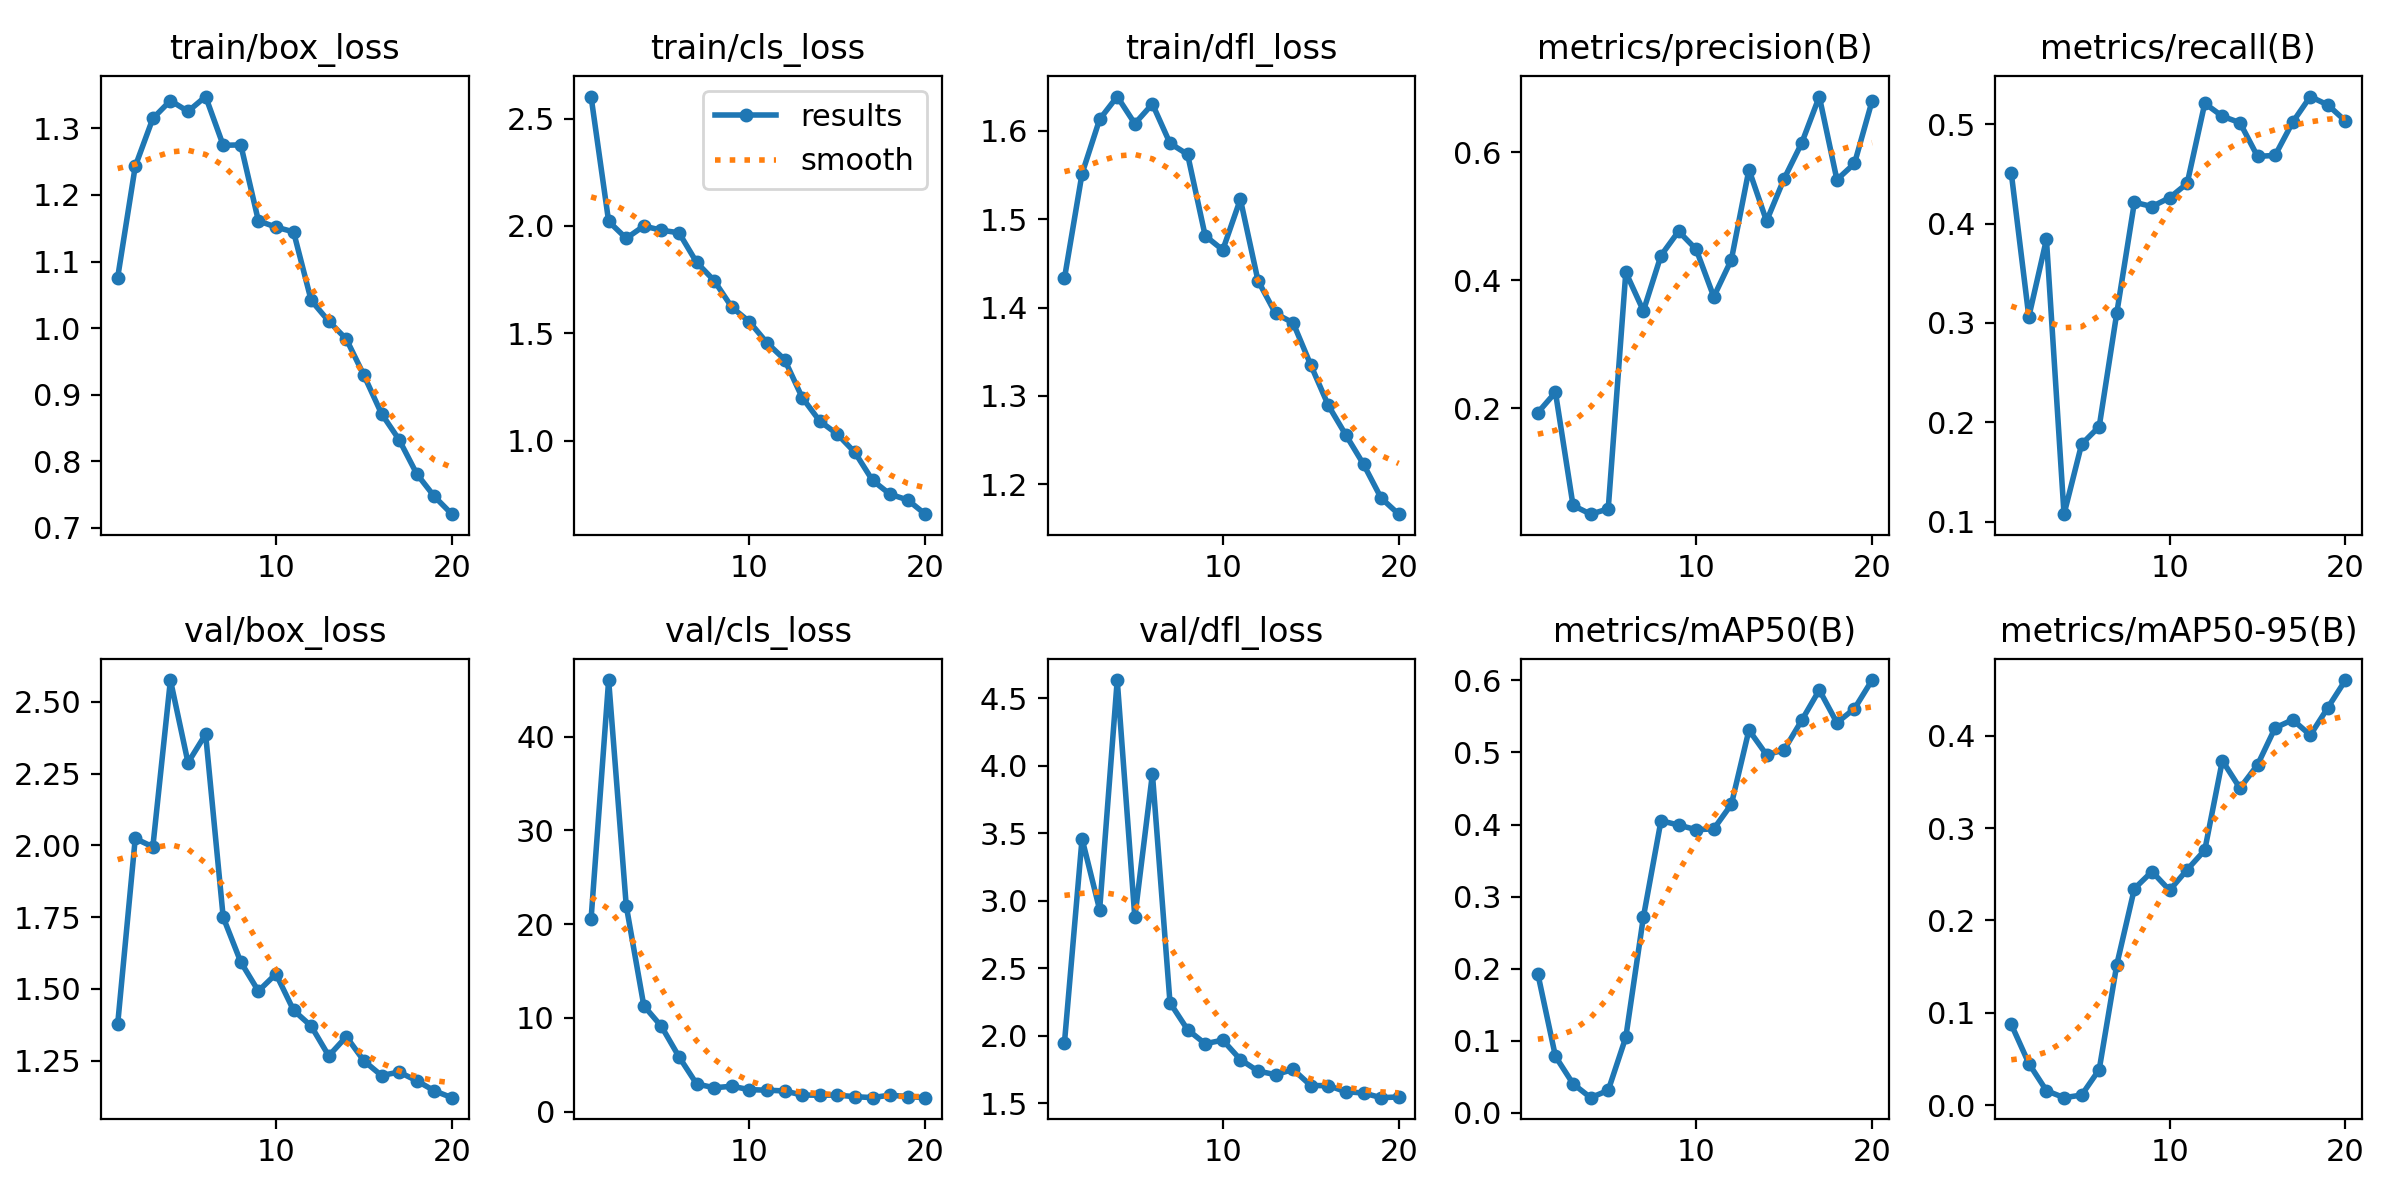

In [ ]:
from IPython.display import Image, display

image_path = '/content/IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium/results.png'
display(Image(filename=image_path))

### Inference

Create inference folder, images folder and labels folder

In [ ]:
import os

inference_dir = "/content/Vehicles/Vehicles-Yolo/inference/"
images_dir = os.path.join(inference_dir, "images")
labels_dir = os.path.join(inference_dir, "labels")
results_dir = os.path.join(inference_dir, "results")

# Create directories
os.makedirs(inference_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

print("Directories for inference created.")

Directories for inference created.


Copy the first 10 files from validation.

In [ ]:
import os
import shutil

source_dir = "/content/Vehicles/Vehicles-Yolo/valid/images"
target_dir = "/content/Vehicles/Vehicles-Yolo/inference/images"

# Get a list of the first 20 files in the source directory
file_list = os.listdir(source_dir)[:10]

# Copy each file to the target directory and save their names in a list
copied_files = []
for filename in file_list:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_dir, filename)
    shutil.copy(source_path, target_path)
    copied_files.append(filename)

print("Copied files:", copied_files)

Copied files: ['dfb39f1fac5cf808_jpg.rf.1Tppe0nEW0DwHxeoZyRC.jpg', 'd82a9b0d237900a7_jpg.rf.MBwOTXuWzt1Kb2j42Sws.jpg', '3a2a06b1d3705da9_jpg.rf.2d7bec38f174007fdee862e87a0681be.jpg', 'c4eeaa22024b4359_jpg.rf.Ly2CmF6i8onnqwfwX8Zn.jpg', '56eaa673deaa0765_jpg.rf.jM9uO1SAKdxUfELrvpBc.jpg', '4d62b3eed8f04f21_jpg.rf.88e97e734086e207cd4845411f5989f4.jpg', 'd25391d708f337ce_jpg.rf.ImHV4MGI4p7qucygMcdj.jpg', '98dadcc0a553da24_jpg.rf.NJ05dQkr3wkFaW6qzPFW.jpg', '31b1c599fd0f2280_jpg.rf.9FbyuGPg6vbindnsI6Wz.jpg', '2ddd5c87ecbc6060_jpg.rf.O8xSaH7Rf5YLRKe5LaIn.jpg']


Copy the related labels

In [ ]:
import os
import shutil

source_labels_dir = "/content/Vehicles/Vehicles-Yolo/valid/labels"
target_labels_dir = "/content/Vehicles/Vehicles-Yolo/inference/labels"

# Use the list of copied filenames
for filename in copied_files:
    label_filename = os.path.splitext(filename)[0] + ".txt"  # Assuming labels have the same name but with .txt extension
    source_label_path = os.path.join(source_labels_dir, label_filename)
    target_label_path = os.path.join(target_labels_dir, label_filename)
    shutil.copy(source_label_path, target_label_path)

print("Copied label files for the copied images.")


Copied label files for the copied images.


This code snippet demonstrates how to use a pre-trained YOLOv8 model for inference on a set of images. It applies object detection to images in the inference folder, and displays the results alongside the original images using matplotlib.

After training a YOLOv8 model, it can be used to perform object detection on new, unseen images.


In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

source = '/content/Vehicles/Vehicles-Yolo/inference/images/'

imgs = os.listdir(source)
c=1
image_count = 1
for img in imgs:
    results = model(source=source+img, conf=0.4, save=True, line_width=2)
    # Show the results
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        # im.show()  # show image
        im.save(results_dir + '/' + str(image_count) + '.jpg')  # save image
    image_count+=1


image 1/1 /content/Vehicles/Vehicles-Yolo/inference/images/dfb39f1fac5cf808_jpg.rf.1Tppe0nEW0DwHxeoZyRC.jpg: 640x640 1 Bus, 1 Truck, 38.5ms
Speed: 3.2ms preprocess, 38.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium2

image 1/1 /content/Vehicles/Vehicles-Yolo/inference/images/d82a9b0d237900a7_jpg.rf.MBwOTXuWzt1Kb2j42Sws.jpg: 640x640 2 Cars, 37.0ms
Speed: 8.5ms preprocess, 37.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium3

image 1/1 /content/Vehicles/Vehicles-Yolo/inference/images/3a2a06b1d3705da9_jpg.rf.2d7bec38f174007fdee862e87a0681be.jpg: 640x640 1 Car, 37.2ms
Speed: 2.9ms preprocess, 37.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to IK_vehicles_yolo/yolov8m_size640_epochs20_batch32_medium4

image 1/1 /content/Vehicles/Vehicles-Yolo/inference/images/c4eeaa

### Actual Annotations

The below code shows the actual annotations on the images.

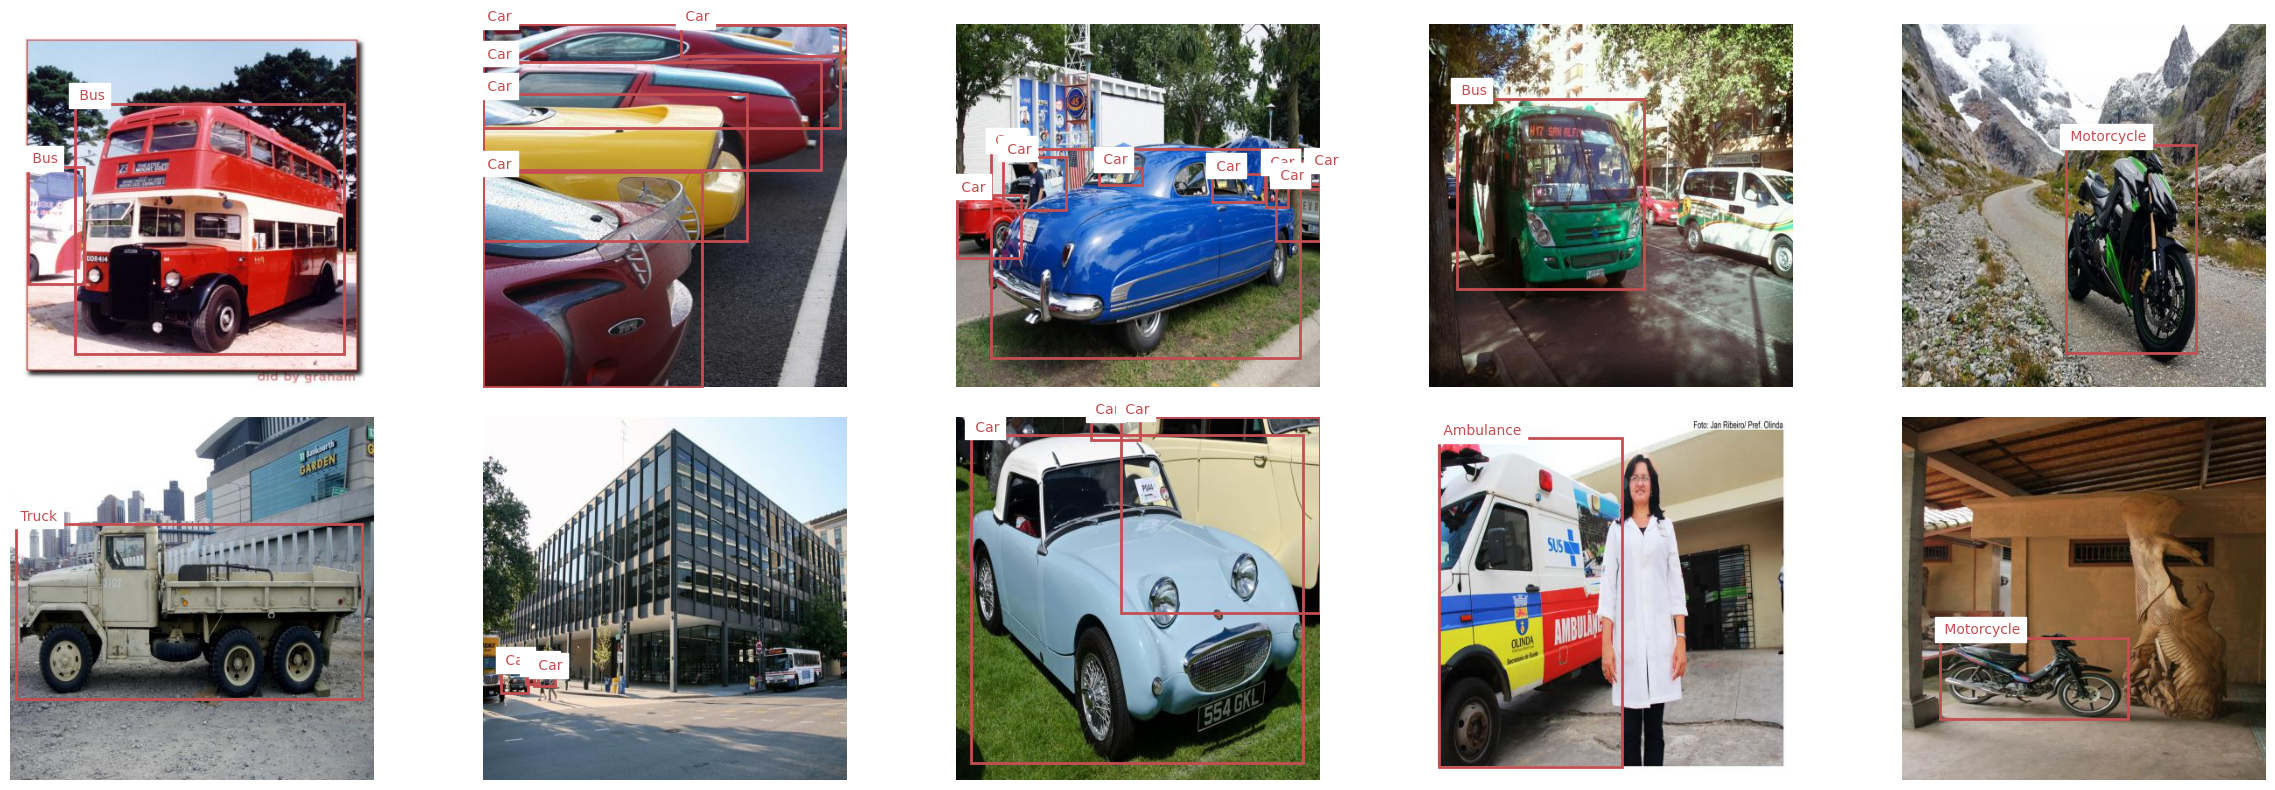

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

# Path to the folder containing images
images_folder = '/content/Vehicles/Vehicles-Yolo/inference/images'

# Path to the folder containing text files
annotations_folder = '/content/Vehicles/Vehicles-Yolo/inference/labels'

# Get a list of image filenames
image_filenames = os.listdir(images_folder)
image_filenames = [filename for filename in image_filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]

id_to_name_mapping = {0:'Ambulance', 1:'Bus', 2:'Car', 3:'Motorcycle', 4:'Truck'}

# Set the number of images per row
images_per_row = 5

# Calculate the number of rows
num_rows = (len(image_filenames) + images_per_row - 1) // images_per_row


# Create a figure with a grid layout
fig = plt.figure(figsize=(24, num_rows * 4))  # Adjust the figsize as needed
gs = gridspec.GridSpec(num_rows, images_per_row, figure=fig)


# Process each image
for i,image_filename in enumerate(image_filenames):
    row = i // images_per_row
    col = i % images_per_row

    image_path = os.path.join(images_folder, image_filename)
    annotation_path = os.path.join(annotations_folder, os.path.splitext(image_filename)[0] + '.txt')

    if os.path.exists(annotation_path):
        with open(annotation_path, 'r') as f:
            lines = f.readlines()

        # Load the image
        img = plt.imread(image_path)

        # Create a figure and axis
        #fig, ax = plt.subplots()
        #ax.imshow(img)

        # Create a subplot within the grid
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(img)

        # Process each line in the annotation file
        for line in lines:
            class_id, center_x, center_y, box_width, box_height = map(float, line.strip().split())
            image_height, image_width, _ = img.shape

            # Convert normalized coordinates to pixel values
            x = center_x * image_width
            y = center_y * image_height
            width = box_width * image_width
            height = box_height * image_height

            # Create a rectangle patch for the bounding box
            rect = Rectangle((x - width / 2, y - height / 2), width, height,
                             linewidth=2, edgecolor='r', facecolor='none')

            # Add the rectangle to the plot
            ax.add_patch(rect)

            # Add class_id text above the bounding box
            ax.text(x - width / 2, y - height / 2 - 5, f' {id_to_name_mapping[int(class_id)]}', color='r', backgroundcolor='white')

        ax.axis('off')


        #plt.axis('off')
plt.tight_layout()
plt.show()

### Predicted Annotations

The below code shows the predicted annotations for the images along with their confidence scores.

In [ ]:
import cv2
import torch
import torchvision
from pathlib import Path

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10


def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=5)
  plt.figure(figsize=(24, 8))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

<ipython-input-19-836c0c3ba7b9>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  images = torch.as_tensor(images)


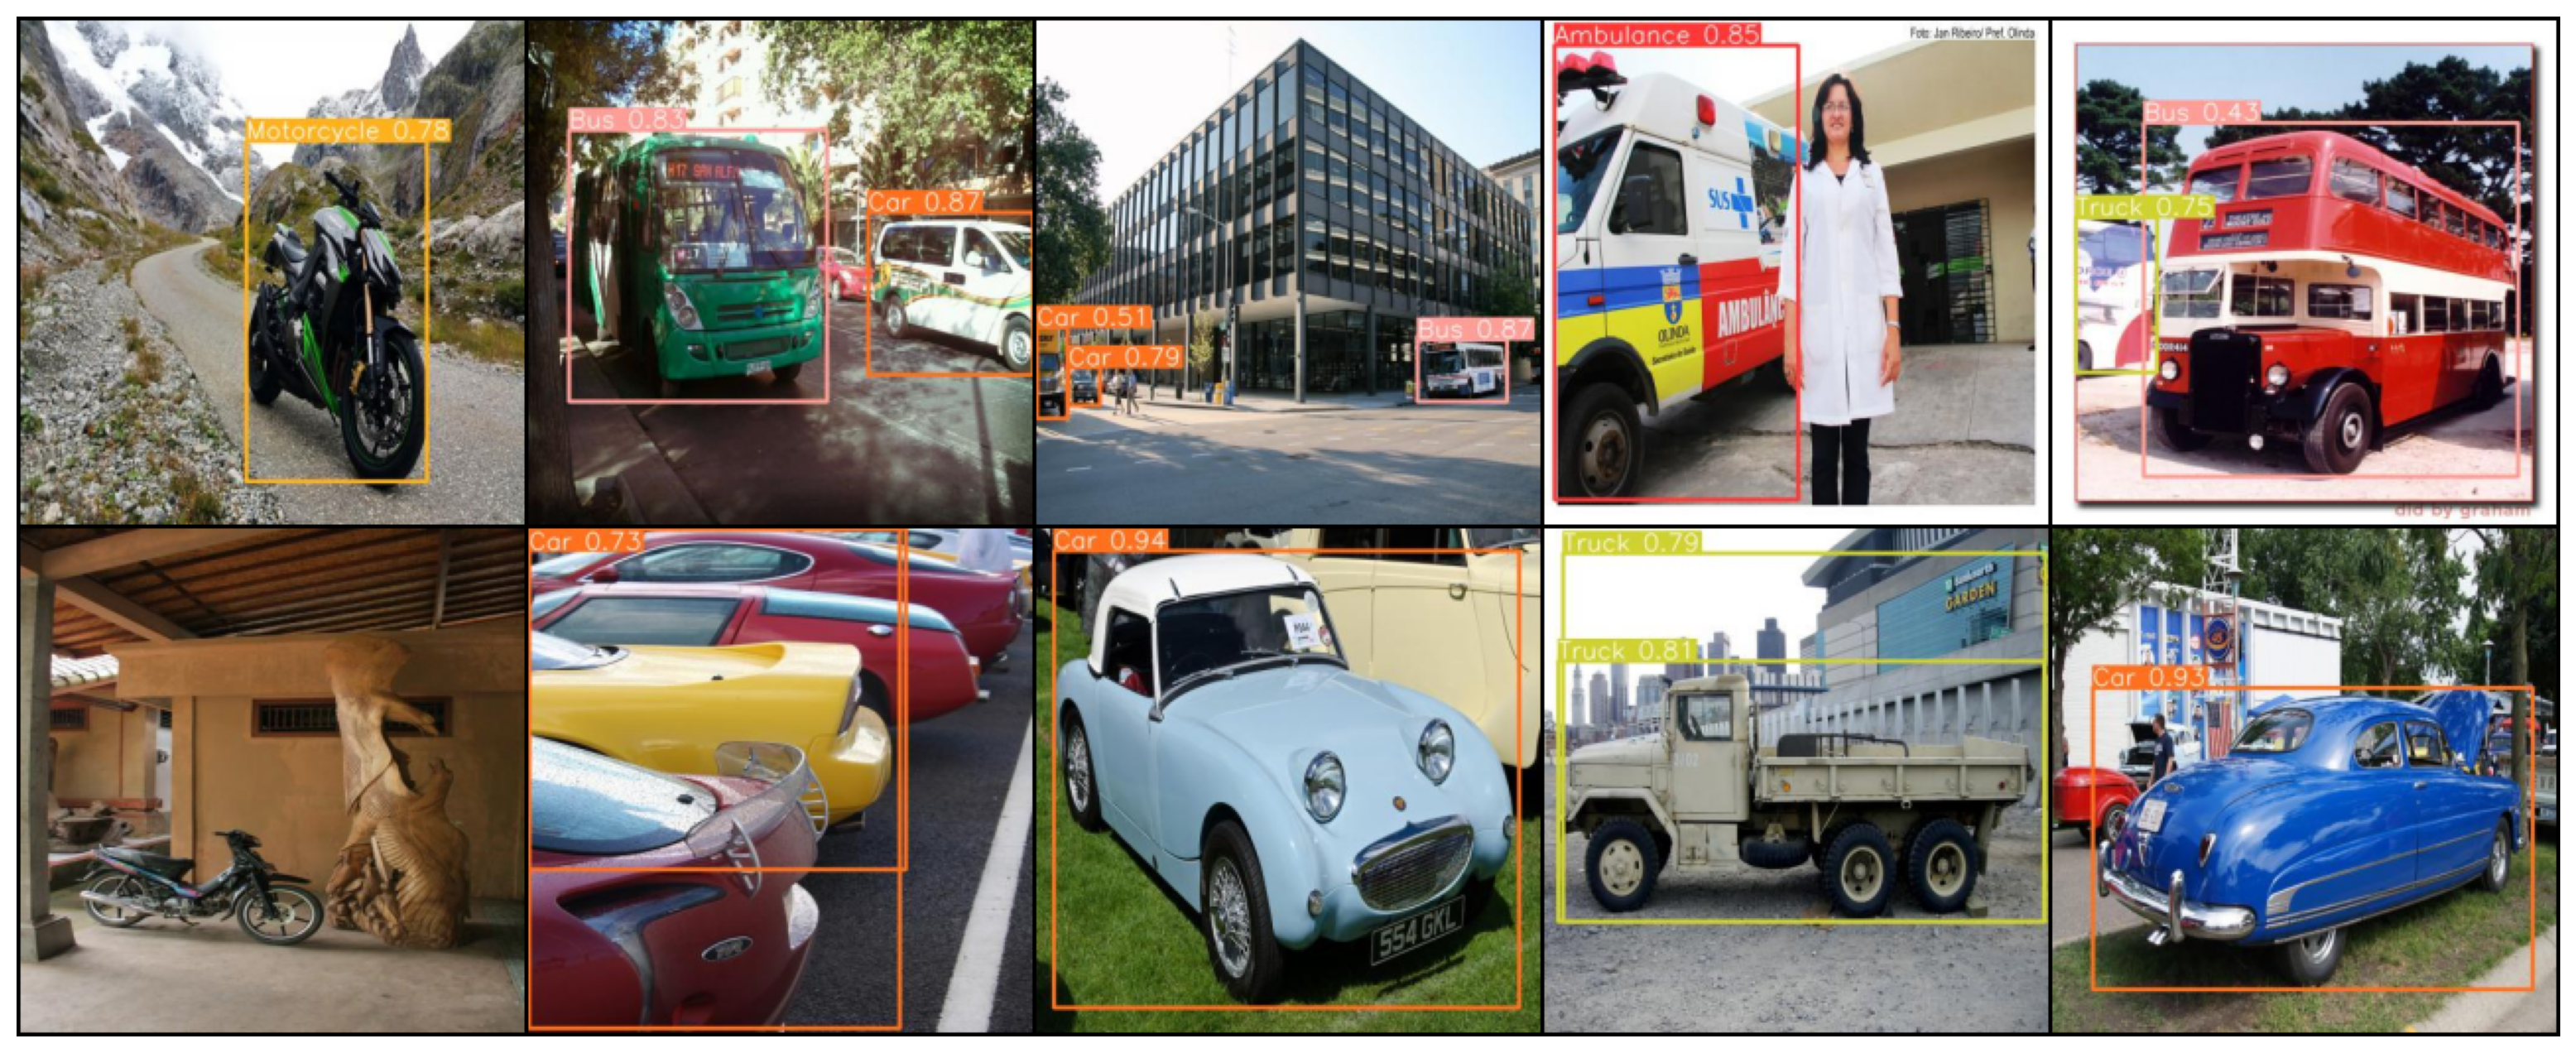

In [ ]:
`img_paths = list(Path("/content/Vehicles/Vehicles-Yolo/inference/results").glob("*.jpg"))[:10]
show_grid(img_paths)